<a href="https://colab.research.google.com/github/Aayush360/Fast_AI/blob/master/full_minst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Notebook imports and Setting the training data

In [ ]:
#hide
!pip install fastai --upgrade
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *

## Implementing the model baseline

In [3]:
path = untar_data(URLs.MNIST)

In [4]:
path.ls()

(#2) [Path('/root/.fastai/data/mnist_png/training'),Path('/root/.fastai/data/mnist_png/testing')]

In [5]:
(path/'training'/'3').ls()

(#6131) [Path('/root/.fastai/data/mnist_png/training/3/32799.png'),Path('/root/.fastai/data/mnist_png/training/3/22578.png'),Path('/root/.fastai/data/mnist_png/training/3/5980.png'),Path('/root/.fastai/data/mnist_png/training/3/44609.png'),Path('/root/.fastai/data/mnist_png/training/3/33772.png'),Path('/root/.fastai/data/mnist_png/training/3/8537.png'),Path('/root/.fastai/data/mnist_png/training/3/57474.png'),Path('/root/.fastai/data/mnist_png/training/3/25282.png'),Path('/root/.fastai/data/mnist_png/training/3/45273.png'),Path('/root/.fastai/data/mnist_png/training/3/22413.png')...]

In [6]:
fns = {i: [fn for fn in (path/'training'/f'{i}').ls()] for i in range(10)}
fns[1][:5]  # look at the first 5 filename in folder 1

[Path('/root/.fastai/data/mnist_png/training/1/30068.png'),
 Path('/root/.fastai/data/mnist_png/training/1/7761.png'),
 Path('/root/.fastai/data/mnist_png/training/1/35345.png'),
 Path('/root/.fastai/data/mnist_png/training/1/30089.png'),
 Path('/root/.fastai/data/mnist_png/training/1/9622.png')]

In [7]:
# open the image and converted it to tensor

In [8]:
img_tensors = {key: [tensor(Image.open(pat)) for pat in paths] for (key,paths) in fns.items()}

In [9]:
img_tensors[5][1][20:50, 10:15]

tensor([[252, 133,  30,  30, 119],
        [252, 252, 252, 252, 252],
        [252, 252, 252, 252, 252],
        [252, 252, 252, 252, 252],
        [121, 252, 252, 252, 252],
        [  0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0]], dtype=torch.uint8)

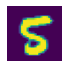

In [10]:
show_image(img_tensors[5][1])

In [11]:
# stack the tensors, convert them to float and normalize the pixels

In [12]:
stacked_tensors = {key: torch.stack(img).float()/255 for (key,img) in img_tensors.items()}

In [13]:
# to check the shape of each stacked_tensors

for k,v in stacked_tensors.items(): print(f'{k} shape is: {v.shape}')

0 shape is: torch.Size([5923, 28, 28])
1 shape is: torch.Size([6742, 28, 28])
2 shape is: torch.Size([5958, 28, 28])
3 shape is: torch.Size([6131, 28, 28])
4 shape is: torch.Size([5842, 28, 28])
5 shape is: torch.Size([5421, 28, 28])
6 shape is: torch.Size([5918, 28, 28])
7 shape is: torch.Size([6265, 28, 28])
8 shape is: torch.Size([5851, 28, 28])
9 shape is: torch.Size([5949, 28, 28])


In [14]:
# calculate the mean for each tensors:

mean_tensors = {key: items.mean(0) for (key,items) in stacked_tensors.items()}

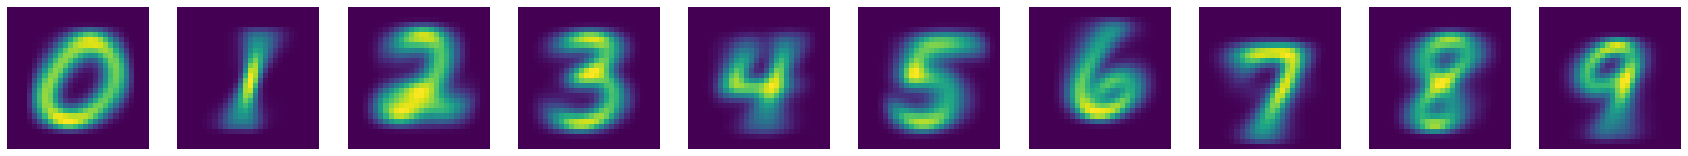

In [15]:
show_images(list(mean_tensors.values()))

In [16]:
# calculate the similarity between sample image and the ideal image

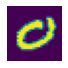

In [17]:
sample_0 = stacked_tensors[0][1]
show_image(sample_0);

In [18]:
# calculate the mean absolute error and root mean squared error

In [19]:
print(' '*3+'MAE  RMSE')
for key,mean in mean_tensors.items():
  dist_mae = (sample_0-mean).abs().mean()
  dist_rmse = ((sample_0-mean)**2).mean().sqrt()
  print(f'{key}: {dist_mae: .4f} {dist_rmse:.4f}')

   MAE  RMSE
0:  0.1496 0.2603
1:  0.1944 0.3783
2:  0.2064 0.3469
3:  0.2193 0.3709
4:  0.1910 0.3443
5:  0.1855 0.3227
6:  0.1811 0.3229
7:  0.1846 0.3403
8:  0.2126 0.3629
9:  0.1932 0.3492


## Prepare Validation Set

In [20]:
(path/'testing').ls()

(#10) [Path('/root/.fastai/data/mnist_png/testing/3'),Path('/root/.fastai/data/mnist_png/testing/1'),Path('/root/.fastai/data/mnist_png/testing/9'),Path('/root/.fastai/data/mnist_png/testing/2'),Path('/root/.fastai/data/mnist_png/testing/8'),Path('/root/.fastai/data/mnist_png/testing/5'),Path('/root/.fastai/data/mnist_png/testing/7'),Path('/root/.fastai/data/mnist_png/testing/0'),Path('/root/.fastai/data/mnist_png/testing/6'),Path('/root/.fastai/data/mnist_png/testing/4')]

In [21]:
valid_fns={i: [fn for fn in (path/'testing'/f'{i}').ls()] for i in range(10)}
valid_stacked_tensor = {key: torch.stack([tensor(Image.open(path)) for path in paths]).float()/255 for(key,paths) in valid_fns.items()}

In [22]:
for k,v in valid_stacked_tensor.items(): print(f'{k}: shape is: {v.shape}')

0: shape is: torch.Size([980, 28, 28])
1: shape is: torch.Size([1135, 28, 28])
2: shape is: torch.Size([1032, 28, 28])
3: shape is: torch.Size([1010, 28, 28])
4: shape is: torch.Size([982, 28, 28])
5: shape is: torch.Size([892, 28, 28])
6: shape is: torch.Size([958, 28, 28])
7: shape is: torch.Size([1028, 28, 28])
8: shape is: torch.Size([974, 28, 28])
9: shape is: torch.Size([1009, 28, 28])


In [23]:
def diff(a,b): return(a-b).abs().mean((-1,-2))

In [24]:
diff_0 = diff(valid_stacked_tensor[0], mean_tensors[0])
diff_1 = diff(valid_stacked_tensor[0],mean_tensors[1])
diff_2 = diff(valid_stacked_tensor[0], mean_tensors[2])

diff_0.shape, diff_1.shape, diff_2.shape


(torch.Size([980]), torch.Size([980]), torch.Size([980]))

In [25]:
diff_combined = torch.stack([diff_0, diff_1, diff_2]).T
diff_combined.shape

torch.Size([980, 3])

In [26]:
mins = diff_combined.min(1)


In [27]:
(mins.indices==0).float().mean()

tensor(0.8980)

In [28]:
# combine all the steps into a single function


In [29]:
def calc_accuracy(image_dict, mean_dict):
  accuracies=[]
  for k,image in image_dict.items():
    diffs = []
    for km, mean in mean_dict.items():
      diffs.append(diff(image,mean))
    diffs = torch.stack(diffs).T
    mins = diffs.min(1)
    acc = (mins.indices==k).float().mean()
    accuracies.append(acc)
  return accuracies


In [30]:
accuracies = calc_accuracy(valid_stacked_tensor, mean_tensors)

In [31]:
print('Class  Accuracy')
for i, acc in enumerate(accuracies): print(f'{i} {acc:.4f}')
print(f'Average accuracy {tensor(accuracies).mean():.4f}')

Class  Accuracy
0 0.8153
1 0.9982
2 0.4234
3 0.6089
4 0.6680
5 0.3262
6 0.7871
7 0.7646
8 0.4425
9 0.7760
Average accuracy 0.6610


### Implementation using SGD

In [34]:
# since we have to predict one of the ten classes our single image could belong to, our label should be a vector of length 10,
# also the loss function should be cross entropy loss

In [35]:
# create a dataset and dataloader for training and validation set

In [36]:
len(stacked_tensors)

10

In [47]:
def create_labels(rows,cols,index):
  '''
  create one-hot encoded matrix with 1 at specific index position
  '''
  labels = torch.zeros((rows,cols))
  labels[:,index]=1
  return labels

In [50]:
# create labels for each of the classes in the training set

stacked_labels = {key: create_labels(tensor.shape[0], len(stacked_tensors), key) for key,tensor in stacked_tensors.items()}
stacked_labels[5][:5]

# all images in the sixth position we have 1, and the rest is 0.

tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [51]:
# combine all the images in the training set into one tensor and flatten them

train_x = torch.cat([o for o in stacked_tensors.values()]).view(-1,28*28)
train_y = torch.cat([o for o in stacked_labels.values()])

train_x.shape, train_y.shape

(torch.Size([60000, 784]), torch.Size([60000, 10]))

In [53]:
for values in stacked_labels.values():
  print(values.shape)

torch.Size([5923, 10])
torch.Size([6742, 10])
torch.Size([5958, 10])
torch.Size([6131, 10])
torch.Size([5842, 10])
torch.Size([5421, 10])
torch.Size([5918, 10])
torch.Size([6265, 10])
torch.Size([5851, 10])
torch.Size([5949, 10])


In [54]:
# do the same for validation set also

valid_stacked_labels = {key: create_labels(tensor.shape[0], len(stacked_tensors), key) for key,tensor in valid_stacked_tensor.items()}
valid_x = torch.cat([o for o in valid_stacked_tensor.values()]).view(-1,28*28)
valid_y = torch.cat([o for o in valid_stacked_labels.values()])

valid_x.shape, valid_y.shape


(torch.Size([10000, 784]), torch.Size([10000, 10]))

In [55]:
# create a dataloader

train_dataset = list(zip(train_x,train_y))
train_dl = DataLoader(train_dataset,bs=64, shuffle=True)
a_batch = first(train_dl)

a_batch[0].shape, a_batch[1].shape 

(torch.Size([64, 784]), torch.Size([64, 10]))

In [56]:
valid_dataset = list(zip(valid_x,valid_y))
valid_dl = DataLoader(valid_dataset,bs=64)


## Define a Loss Function

In [57]:
def cross_entropy_loss(preds, targets):
  loss = -(targets*preds.log()).sum()/len(preds)
  return loss

In [58]:
# let's check for a dummy value

targets = torch.tensor([0,0,1])
preds = torch.tensor([0.2,0.5,0.7])
cross_entropy_loss(preds,targets)

tensor(0.1189)

In [60]:
# use the softmax function to turn the prediction into probabilities, which sums to 1

def cross_entropy_loss(preds,targets):
  preds = preds.softmax(dim=1)
  loss = -(targets*preds.log()).sum()/len(preds)
  return loss

## Define the network

In [62]:
def init_params(size, std=1.0):
  return (torch.randn(size)*std).requires_grad_()

In [63]:
weights = init_params((28*28,10))
bias = init_params(1)

In [64]:
weights.shape

torch.Size([784, 10])

In [65]:
def linear1(xb):
  return xb@weights+bias

In [66]:
images, labels = a_batch
preds = linear1(images)
loss = cross_entropy_loss(preds, labels)
loss

tensor(16.7447, grad_fn=<DivBackward0>)

In [68]:
preds = linear1(images)
preds.shape


torch.Size([64, 10])

In [69]:
labels.shape

torch.Size([64, 10])

In [70]:
# backpropagate the loss

loss.backward()

In [71]:
lr = 1e-3
weights.data-= lr*weights.grad
bias.data-=lr*bias.grad

In [72]:
weights.grad=None
bias.grad=None

In [73]:
# checking if loss has reduced

preds = linear1(images)
loss = cross_entropy_loss(preds,labels)
loss

tensor(16.7245, grad_fn=<DivBackward0>)

In [74]:
def calc_grad(images, labels, model):
  preds = model(images)
  loss = cross_entropy_loss(preds, labels)
  loss.backward()
  

In [76]:
def train_epoch(model, lr, params):
  for images,labels in train_dl:
    calc_grad(images,labels,model)
    for p in params: # loop over and update weights and bias
      p.data-=lr*p.grad
      p.grad.zero_()


In [77]:
def calc_accuracy(preds,targets):
  preds = preds.softmax(dim=1)
  preds_i = preds.max(1).indices
  targets_i = targets.max(1).indices
  return (preds_i==targets_i).float().mean()

In [78]:
def validate_epoch(model):
  accs = [calc_accuracy(model(images),labels) for images,labels in valid_dl]
  return torch.stack(accs).mean()

In [79]:
validate_epoch(linear1)

tensor(0.0739)

In [80]:
for _ in range(40):
  train_epoch(linear1, lr, (weights,bias))
  print(f'{validate_epoch(linear1):.4f}', end=' ')

0.0944 0.1290 0.1703 0.2149 0.2550 0.2941 0.3252 0.3562 0.3835 0.4097 0.4326 0.4540 0.4773 0.4950 0.5096 0.5251 0.5392 0.5536 0.5663 0.5770 0.5867 0.5967 0.6056 0.6136 0.6222 0.6298 0.6379 0.6456 0.6510 0.6571 0.6628 0.6689 0.6752 0.6812 0.6857 0.6914 0.6952 0.6996 0.7036 0.7067 

In [82]:
# basline model got 66.10 while model with SGD got 70.67
# we have been able to surpass the performance of basline model

## Create and Optimizer

In [91]:
class Optimizer:
  def __init__(self, params, lr):
    self.params = list(params)
    self.lr = lr
  
  def step(self):
    for p in self.params:
      p.data-=p.grad*self.lr
  
  def zero_grad(self):
    for p in self.params:
      p.grad = None

In [92]:
optim = Optimizer((weights,bias),lr)

In [95]:
# TRAIN_EPOCHS now becomes

def train_epoch(model,optim):
  for images,labels in train_dl:
    calc_grad(images,labels,model)
    optim.step()
    optim.zero_grad()



In [96]:
for _ in range(10):
  train_epoch(linear1,optim)
  print(f'{validate_epoch(linear1):.4f}', end=' ')
  

0.7101 0.7126 0.7160 0.7191 0.7224 0.7255 0.7293 0.7329 0.7356 0.7374 

In [97]:
# let's put the above loop inside a function

def train_model(model,optim,epochs):
  for _ in range(epochs):
    train_epoch(model,optim)
    print(f'{validate_epoch(model):.4f}', end=' ')
  


In [98]:
train_model(linear1, optim,10)

0.7397 0.7419 0.7443 0.7461 0.7487 0.7499 0.7516 0.7533 0.7556 0.7574 

## Replace our optimizer with Pytorch SGD and our linear1 model with nn.linear (linear module) 
## Also let us repalce the training loop with fast ai's Learner

In [99]:
linear = nn.Linear(28*28, 10) # does the same thing as init_parameter and linear1 together
optim = SGD(linear.parameters(),lr)



In [100]:
dls = DataLoaders(train_dl, valid_dl)


In [101]:
learn = Learner(dls, linear, opt_func=SGD, loss_func=cross_entropy_loss, metrics=calc_accuracy)


In [102]:
learn.fit(10,lr=lr)

epoch,train_loss,valid_loss,calc_accuracy,time
0,1.609623,1.560260,0.771400,00:02
1,1.230288,1.200466,0.812000,00:02
2,1.035724,1.002126,0.828600,00:02
3,0.904997,0.879477,0.840800,00:02
4,0.830186,0.796053,0.847700,00:02
5,0.764524,0.735867,0.853900,00:02
6,0.702281,0.690018,0.858500,00:02
7,0.672464,0.654008,0.862200,00:02
8,0.645764,0.624767,0.864700,00:02
9,0.628825,0.600266,0.868500,00:02


## Adding a non-linearity to the model

In [104]:
model = nn.Sequential(
     nn.Linear(28*28,128),  
     nn.ReLU(),  
     nn.Linear(128,10) 
    )

In [105]:
learn = Learner(dls,model,loss_func=cross_entropy_loss, opt_func=SGD, metrics=calc_accuracy)

In [106]:
learn.fit(40,1e-2)

epoch,train_loss,valid_loss,calc_accuracy,time
0,0.632940,0.591582,0.864400,00:03
1,0.431242,0.405655,0.893700,00:03
2,0.368443,0.351003,0.904200,00:03
3,0.337220,0.322774,0.910800,00:03
4,0.306278,0.302487,0.915400,00:03
5,0.303930,0.286709,0.920500,00:03
6,0.272084,0.275379,0.923000,00:03
7,0.276512,0.264942,0.926000,00:03
8,0.261160,0.255517,0.928500,00:03
9,0.237433,0.245541,0.930800,00:03


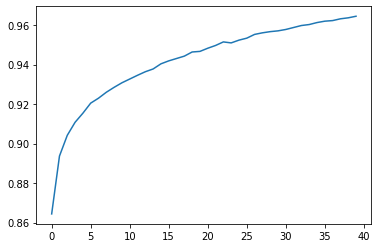

In [109]:
plt.plot(L(learn.recorder.values).itemgot(2));

## Scaling up and using Resnet18

In [110]:
dls = ImageDataLoaders.from_folder(path,train='training',valid='testing')
learn = cnn_learner(dls,resnet18, pretrained=False, loss_func=F.cross_entropy, metrics=accuracy)
learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.187359,0.165880,0.947700,01:05
1,0.081094,0.074855,0.979900,01:05
2,0.051536,0.036066,0.989000,01:06
3,0.018102,0.020283,0.994300,01:05
4,0.013370,0.016824,0.994200,01:05
